In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Use Pandas read_csv to load the us-counties.csv file.

The columns of the CSV file are:

date   - The date as a string (don't forget to convert this to a `pd.datetime`)

county - The name of the county

state  - The name of the state

fips   - The fips code of the county (the first two digits represent the state, the last three, the county)

cases  - The cumulative number of cases at the date in the county

deaths - The cumulative number of deaths in at the date in the county

In [2]:
df = pd.read_csv('us-counties.csv')
df['date'] = pd.to_datetime(df['date'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780874 entries, 0 to 1780873
Data columns (total 6 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   county  object        
 2   state   object        
 3   fips    float64       
 4   cases   int64         
 5   deaths  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 81.5+ MB


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


#### Question 1: Produce a DataFrame that contains only the data for the top 10 Counties by total number of cases

In [3]:
# Get the data for all counties on the most recent date.
df['date'].max()
df_1003 = df[df['date'] == '2021-10-03 00:00:00']
df_1003.head()

,date,county,state,fips,cases,deaths
1777624,2021-10-03,Autauga,Alabama,1001.0,9780,142.0
1777625,2021-10-03,Baldwin,Alabama,1003.0,36579,518.0
1777626,2021-10-03,Barbour,Alabama,1005.0,3519,71.0
1777627,2021-10-03,Bibb,Alabama,1007.0,4157,83.0
1777628,2021-10-03,Blount,Alabama,1009.0,9870,162.0


In [4]:
# Find the names for the top counties
top_counties = df_1003.sort_values('cases', axis=0, ascending=False).iloc[:10, :]
county_state_names = list(zip(list(top_counties['county']), list(top_counties['state'])))
print(county_state_names)

[('Los Angeles', 'California'), ('New York City', 'New York'), ('Maricopa', 'Arizona'), ('Miami-Dade', 'Florida'), ('Cook', 'Illinois'), ('Harris', 'Texas'), ('Dallas', 'Texas'), ('San Diego', 'California'), ('Riverside', 'California'), ('San Bernardino', 'California')]


In [5]:
# Get the data for the top counites, combine them together
df_is = []
for county_state in county_state_names:
    county, state = county_state
    df_i = df[(df['county'] == county) & (df['state'] == state)]
    df_is.append(df_i)
    
top_counties = pd.concat(df_is, axis=0)
top_counties.head()

,date,county,state,fips,cases,deaths
9,2020-01-26,Los Angeles,California,6037.0,1,0.0
14,2020-01-27,Los Angeles,California,6037.0,1,0.0
19,2020-01-28,Los Angeles,California,6037.0,1,0.0
24,2020-01-29,Los Angeles,California,6037.0,1,0.0
29,2020-01-30,Los Angeles,California,6037.0,1,0.0


####  Question 2: Produce a DataFrame that contains only the data for the top 5 states by total number of cases

In [6]:
# Group by states
df_states = df_1003.groupby('state').sum().reset_index()
df_states = df_states[['state', 'cases', 'deaths']]
df_states.head()

,state,cases,deaths
0,Alabama,800692,14470.0
1,Alaska,114867,560.0
2,American Samoa,1,0.0
3,Arizona,1102422,20137.0
4,Arkansas,498062,7740.0


In [7]:
# Find the names for the top states
top_states = df_states.sort_values('cases', axis=0, ascending=False).iloc[:5, :]
state_names =list(top_states['state'])
print(state_names)

['California', 'Texas', 'Florida', 'New York', 'Illinois']


In [8]:
# Get the data for the top states, combine them together
df_states = df.groupby(['state', 'date'], axis=0).sum().reset_index()
top_states = []
for i in range(len(state_names)):
    top_states_i = df_states[df_states['state'] == state_names[i]]
    top_states.append(top_states_i)
top_states = pd.concat(top_states)
top_states = top_states[['state', 'date', 'cases', 'deaths']]
top_states.head()

,state,date,cases,deaths
2347,California,2020-01-25,1,0.0
2348,California,2020-01-26,2,0.0
2349,California,2020-01-27,2,0.0
2350,California,2020-01-28,2,0.0
2351,California,2020-01-29,2,0.0


#### Question 3: Calculate the incidence (the number of new cases per day... i.e. the difference between the cases on a day - the cases on a previous day) for the top 10 Counties.

In [9]:
# Function to calculate incidence
def calc_incidence_index(row, df):
    prev_index = (row.name[0], pd.to_datetime(row.name[1])-pd.offsets.Day(1))
    if prev_index in df.index: 
        return row['cases'] - df.loc[prev_index]['cases']
    else:
        return 0
    
top_counties_incidence2 = top_counties.set_index(['county', 'date'])
top_counties_incidence2['incidence'] = top_counties_incidence2.apply(lambda x: calc_incidence_index(x, top_counties_incidence2), axis=1)
top_counties_incidence2.head(60)

state    fips  cases  deaths  incidence
county      date                                                    
Los Angeles 2020-01-26  California  6037.0      1     0.0          0
            2020-01-27  California  6037.0      1     0.0          0
            2020-01-28  California  6037.0      1     0.0          0
            2020-01-29  California  6037.0      1     0.0          0
            2020-01-30  California  6037.0      1     0.0          0
            2020-01-31  California  6037.0      1     0.0          0
            2020-02-01  California  6037.0      1     0.0          0
            2020-02-02  California  6037.0      1     0.0          0
            2020-02-03  California  6037.0      1     0.0          0
            2020-02-04  California  6037.0      1     0.0          0
            2020-02-05  California  6037.0      1     0.0          0
            2020-02-06  California  6037.0      1     0.0          0
            2020-02-07  California  6037.0      1     0.0          0
            2020-02-08  California  6037.0      1     0.0          0
            2020-02-09  California  6037.0      1     0.0          0
            2020-02-10  California  6037.0      1     0.0          0
            2020-02-11  California  6037.0      1     0.0          0
            2020-02-12  California  6037.0      1     0.0          0
            2020-02-13  California  6037.0      1     0.0          0
            2020-02-14  California  6037.0      1     0.0          0
            2020-02-15  California  6037.0      1     0.0          0
            2020-02-16  California  6037.0      1     0.0          0
            2020-02-17  California  6037.0      1     0.0          0
            2020-02-18  California  6037.0      1     0.0          0
            2020-02-19  California  6037.0      1     0.0          0
            2020-02-20  California  6037.0      1     0.0          0
            2020-02-21  California  6037.0      1     0.0          0
            2020-02-22  California  6037.0      1     0.0          0
            2020-02-23  California  6037.0      1     0.0          0
            2020-02-24  California  6037.0      1     0.0          0
            2020-02-25  California  6037.0      1     0.0          0
            2020-02-26  California  6037.0      1     0.0          0
            2020-02-27  California  6037.0      1     0.0          0
            2020-02-28  California  6037.0      1     0.0          0
            2020-02-29  California  6037.0      1     0.0          0
            2020-03-01  California  6037.0      1     0.0          0
            2020-03-02  California  6037.0      1     0.0          0
            2020-03-03  California  6037.0      1     0.0          0
            2020-03-04  California  6037.0      7     0.0          6
            2020-03-05  California  6037.0     11     0.0          4
            2020-03-06  California  6037.0     13     0.0          2
            2020-03-07  California  6037.0     14     0.0          1
            2020-03-08  California  6037.0     14     0.0          0
            2020-03-09  California  6037.0     19     0.0          5
            2020-03-10  California  6037.0     20     0.0          1
            2020-03-11  California  6037.0     28     1.0          8
            2020-03-12  California  6037.0     32     1.0          4
            2020-03-13  California  6037.0     40     1.0          8
            2020-03-14  California  6037.0     53     1.0         13
            2020-03-15  California  6037.0     69     1.0         16
            2020-03-16  California  6037.0     94     1.0         25
            2020-03-17  California  6037.0    144     1.0         50
            2020-03-18  California  6037.0    190     1.0         46
            2020-03-19  California  6037.0    231     2.0         41
            2020-03-20  California  6037.0    292     2.0         61
            2020-03-21  California  6037.0    351     4.0         59
            2020-03-22  Cal

#### Question 4: Calculate the peak incidence for the 10 counties (the day with the highest number of new cases).

In [10]:
county_peaks = {}
for county, state in county_state_names:
    date = top_counties_incidence2.loc[county]['incidence'].idxmax()
    incidence = top_counties_incidence2.loc[(county, date), 'incidence']
    county_peaks[county] = [state, date, incidence]
county_peaks = pd.DataFrame(county_peaks).T
county_peaks = county_peaks.reset_index()
county_peaks.columns = ['county', 'state', 'date', 'incidence']
county_peaks = county_peaks.sort_values('incidence', ascending=False)
county_peaks.head(10)

,county,state,date,incidence
0,Los Angeles,California,2020-12-26,29174
3,Miami-Dade,Florida,2021-08-13,21655
1,New York City,New York,2021-03-24,16715
7,San Diego,California,2021-07-01,15453
5,Harris,Texas,2020-09-21,14129
2,Maricopa,Arizona,2021-01-03,11761
8,Riverside,California,2021-01-12,8341
9,San Bernardino,California,2020-12-16,8026
4,Cook,Illinois,2020-11-01,6697
6,Dallas,Texas,2021-09-09,6162


#### Question 5: Plot an incidence curve for the County with the highest peak.

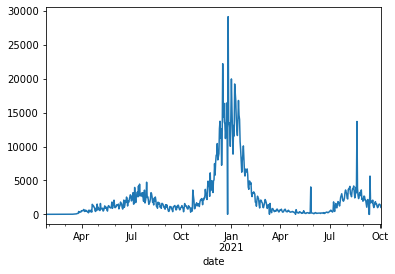

In [11]:
# Los Angeles is the county with the highest peak
LA = top_counties_incidence2.loc['Los Angeles']['incidence'].plot()

#### Question 6: Plot a vertical bar graph with County as the category and the peak incidence as the measure.

Text(0.5, 1.0, 'The peak incidences for different counties')

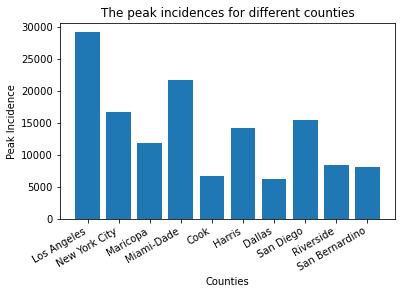

In [12]:
bars = []
incidences = []
for i in range(len(county_peaks)):
    bars.append(county_peaks.loc[i, 'county'])
    incidences.append(county_peaks.loc[i, 'incidence'])
# plt.bar(bars, incidences)
# plt.autofmt_xdate()
fig, ax = plt.subplots()
ax.bar(bars, incidences)
fig.autofmt_xdate()
ax.set_xlabel('Counties')
ax.set_ylabel('Peak Incidence')
ax.set_title('The peak incidences for different counties')